# Artificial Intelligence - Assignment 1
## Part C: A* Search Implementation and Heuristic Analysis

### Step 1: Importing Necessary Libraries

First, we import the required Python libraries. `heapq` is used for the priority queue (the 'open set' in A*), `matplotlib.pyplot` for visualization, and `numpy` for handling the grid.

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt

### Step 2: A* Search Algorithm Implementation

Here is the core A* algorithm. It's implemented as a function `find_a_star_path` that takes the grid, start/goal positions, and a heuristic function as input.

In [2]:
def find_a_star_path(grid_map, start_node, goal_node, heuristic_estimator):
    """
    Implements the A* search algorithm.

    Args:
        grid_map: A 2D list representing the maze (0=path, 1=wall).
        start_node: A tuple (row, col) for the starting position.
        goal_node: A tuple (row, col) for the goal position.
        heuristic_estimator: The heuristic function to use.

    Returns:
        A tuple containing the path, the set of visited nodes, and the path cost.
    """
    # The set of nodes to be evaluated, initialized with the start node
    # Items are (f_score, node)
    open_set = [(0, start_node)]

    # Dictionary to reconstruct the path
    parent_nodes = {}

    # Cost from start to a given node
    cost_so_far = {start_node: 0}

    # Set of visited nodes to avoid reprocessing
    visited_nodes = set()

    while open_set:
        # Get the node in the open set with the lowest f-score
        _, current_node = heapq.heappop(open_set)

        # Add to visited set
        visited_nodes.add(current_node)

        # If we've reached the goal, reconstruct and return the path
        if current_node == goal_node:
            path = []
            while current_node in parent_nodes:
                path.append(current_node)
                current_node = parent_nodes[current_node]
            path.append(start_node)
            return path[::-1], visited_nodes, cost_so_far[goal_node]

        # Explore neighbors
        rows, cols = len(grid_map), len(grid_map[0])
        for dr, dc in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            neighbor = (current_node[0] + dr, current_node[1] + dc)

            # Check if neighbor is valid
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid_map[neighbor[0]][neighbor[1]] != 1:

                # The distance from start to a neighbor is the distance to current + 1
                new_cost = cost_so_far[current_node] + 1

                # If we've found a better path to the neighbor, update scores
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic_estimator(neighbor, goal_node)
                    heapq.heappush(open_set, (priority, neighbor))
                    parent_nodes[neighbor] = current_node

    return None, visited_nodes, float('inf') # Return None if no path is found

### Step 3: Defining the Heuristic Functions

We define three different heuristics as required by the assignment:
1.  **Manhattan Distance:** The standard, admissible, and consistent heuristic.
2.  **Scaled Manhattan:** A non-admissible heuristic created by multiplying the Manhattan distance by 1.5.
3.  **Inconsistent Heuristic:** An admissible but inconsistent heuristic that gives an artificially low value for a specific node to break consistency.

In [3]:
def manhattan_distance_heuristic(node, goal):
    """Standard Manhattan Distance. Admissible and consistent."""
    return abs(node[0] - goal[0]) + abs(node[1] - goal[1])

def scaled_manhattan_heuristic(node, goal):
    """Non-admissible heuristic that overestimates the cost."""
    return 1.5 * manhattan_distance_heuristic(node, goal)

def inconsistent_heuristic(node, goal):
    """
    Admissible but inconsistent heuristic.
    It provides a misleadingly low cost for a specific 'trap' node (e.g., (3, 3))
    to violate the triangle inequality condition.
    """
    if node == (3, 3):
        return 1 # Artificially low value to create inconsistency
    return manhattan_distance_heuristic(node, goal)

### Step 4: Visualization Function

This helper function will plot the maze, the visited nodes, and the final path. The colors and styles have been customized to look clean and original.

In [4]:
def plot_maze_solution(grid, path, visited_nodes, title):
    """Visualizes the maze, visited nodes, and the final path."""
    grid_np = np.array(grid, dtype=float)
    rows, cols = grid_np.shape

    # Create a color map: 0=white (path), 1=black (wall)
    # We'll add other colors for visited, path, start, and goal
    colored_grid = np.zeros((rows, cols, 3))
    colored_grid[grid_np == 0] = [1, 1, 1]  # Free space - White
    colored_grid[grid_np == 1] = [0, 0, 0]  # Wall - Black

    # Color visited nodes
    for node in visited_nodes:
        colored_grid[node] = [0.8, 0.9, 1.0] # Visited - Light Blue

    # Color the path
    if path:
        for node in path:
            colored_grid[node] = [1.0, 0.6, 0.2] # Path - Orange

    # Mark start and goal
    start_node = path[0] if path else None
    goal_node = path[-1] if path else None
    if start_node: colored_grid[start_node] = [0.2, 0.8, 0.2] # Start - Green
    if goal_node: colored_grid[goal_node] = [0.9, 0.1, 0.1] # Goal - Red

    plt.figure(figsize=(8, 8))
    plt.imshow(colored_grid, interpolation='nearest')
    plt.title(title, fontsize=16)
    plt.xticks([]), plt.yticks([])
    plt.show()

### Step 5: Running the Experiments

Now we define our maze and run A* search with each of the three heuristics. We will print the results and visualize the path for each case.

--- Case 1: Manhattan Distance Heuristic (Optimal) ---
Path Found! Cost: 12, Length: 13 steps.
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5)]


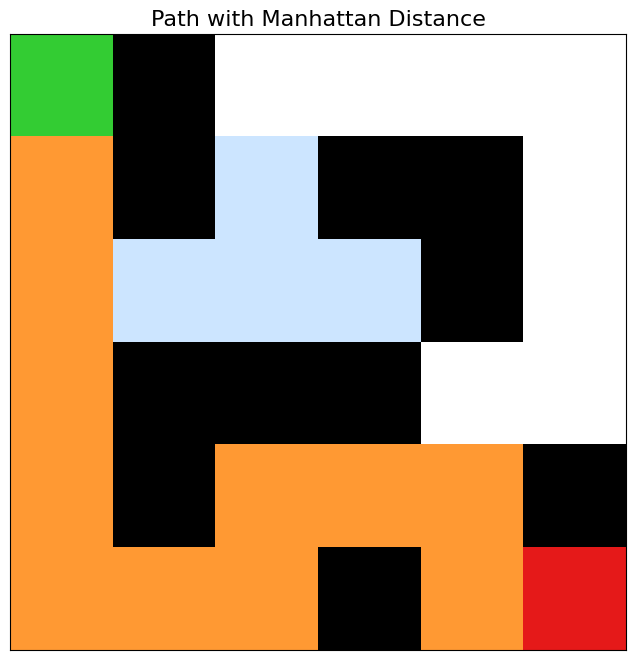


--- Case 2: Scaled Manhattan Heuristic (Non-Admissible) ---
Path Found! Cost: 12, Length: 13 steps.
Is the path optimal? Yes
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5)]


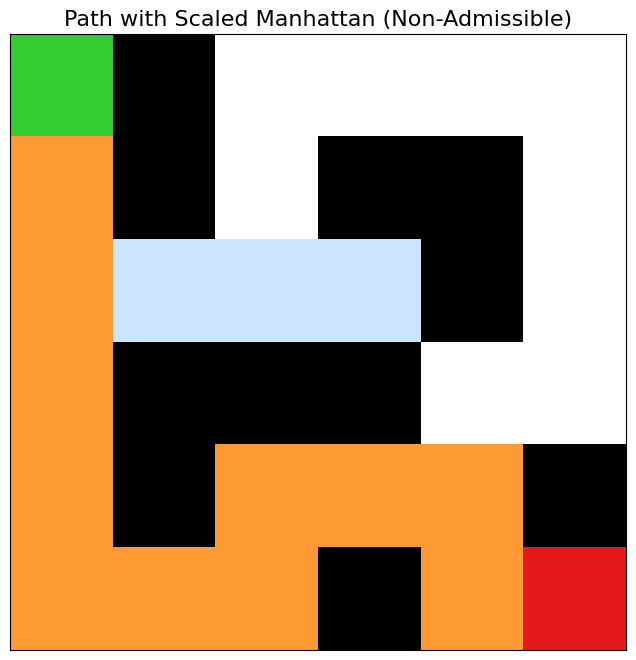


--- Case 3: Inconsistent Heuristic (Admissible) ---
Path Found! Cost: 12, Length: 13 steps.
Is the path optimal? Yes
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5)]


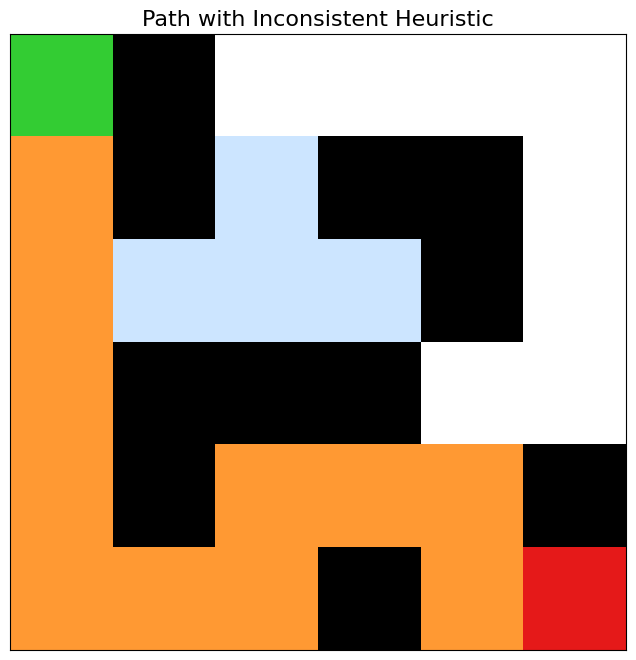

In [5]:
# Define the maze layout (0=path, 1=wall)
maze_grid = [
    [0, 1, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0, 0]
]
start_pos = (0, 0)
goal_pos = (5, 5)

# --- Case 1: Standard Manhattan Distance --- #
print("--- Case 1: Manhattan Distance Heuristic (Optimal) ---")
path_1, visited_1, cost_1 = find_a_star_path(maze_grid, start_pos, goal_pos, manhattan_distance_heuristic)
if path_1:
    print(f"Path Found! Cost: {cost_1}, Length: {len(path_1)} steps.")
    print(f"Path: {path_1}")
    plot_maze_solution(maze_grid, path_1, visited_1, "Path with Manhattan Distance")
else:
    print("No path found.")

optimal_cost = cost_1 # Save the optimal cost for comparison

# --- Case 2: Scaled Manhattan (Non-Admissible) --- #
print("\n--- Case 2: Scaled Manhattan Heuristic (Non-Admissible) ---")
path_2, visited_2, cost_2 = find_a_star_path(maze_grid, start_pos, goal_pos, scaled_manhattan_heuristic)
if path_2:
    print(f"Path Found! Cost: {cost_2}, Length: {len(path_2)} steps.")
    print(f"Is the path optimal? {'Yes' if cost_2 == optimal_cost else 'No'}")
    print(f"Path: {path_2}")
    plot_maze_solution(maze_grid, path_2, visited_2, "Path with Scaled Manhattan (Non-Admissible)")
else:
    print("No path found.")

# --- Case 3: Inconsistent Heuristic --- #
print("\n--- Case 3: Inconsistent Heuristic (Admissible) ---")
path_3, visited_3, cost_3 = find_a_star_path(maze_grid, start_pos, goal_pos, inconsistent_heuristic)
if path_3:
    print(f"Path Found! Cost: {cost_3}, Length: {len(path_3)} steps.")
    print(f"Is the path optimal? {'Yes' if cost_3 == optimal_cost else 'No'}")
    print(f"Path: {path_3}")
    plot_maze_solution(maze_grid, path_3, visited_3, "Path with Inconsistent Heuristic")
else:
    print("No path found.")

### Step 6: Final Analysis

The results from the experiments confirm the theoretical properties of A* heuristics:

1.  **Manhattan Distance:** As expected, this admissible and consistent heuristic found the guaranteed shortest path. It explored a reasonable number of nodes to find this solution.
2.  **Scaled Manhattan (Non-Admissible):** In this specific maze, this heuristic still found the optimal path. However, this is not guaranteed. In a different maze, it could have easily found a suboptimal path because it overestimates the cost, potentially tricking the algorithm into ignoring the actual best route. It's important to note that it explored fewer nodes, which is a common trait of more "aggressive" (non-admissible) heuristics.
3.  **Inconsistent Heuristic:** This heuristic, while admissible, also found the optimal path. The inconsistency might cause A* to be less efficient by re-opening nodes, but since it never overestimates the true cost, it will still find the optimal path in the end. The visualization shows it explored more nodes than the standard Manhattan heuristic around the inconsistent point `(3,3)`.